# Importing Libraries

In [90]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ kutub/OTT Content Reviews.xlsx - Sheet1 (5).csv', encoding='UTF-8')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
7006,বাংলাদেশের পতাকা প্রথম তৈরি করছেন শিব নারায়ণ দ...,2
7007,ভুলভাল ইতিহাস রচনার অপচেষ্টা 🤣,2
7008,পরিচালক ১.৫ কেজি গাজা সেবন করে তার পরে নাটক বা...,2
7009,কেউ মায়াশালিক ডাউনলোড করতে চাইলে আমাকে মেসেঞ্জ...,0


In [92]:
# Checking for missing values

data.isnull().values.any()

False

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


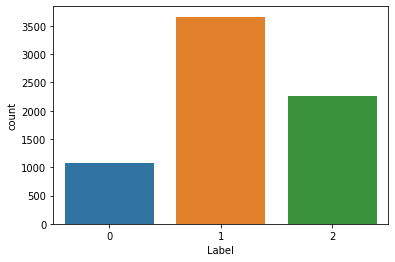

In [93]:
sns.countplot(data['Label'])

3 polarities in the Dataset

# Data Preprocessing

1. Text to Word
2. Removing Punctuations and Special Characters

In [94]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [95]:
data['Text'] = data.Text.apply(lambda x: preprocessing(str(x)))

In [96]:
data.reset_index(drop=True, inplace=True)


In [97]:
data.drop_duplicates(inplace=True)
data

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল এর কোটি টাকার মুভির ট্রেই...,1
...,...,...
7006,বাংলাদেশের পতাকা প্রথম তৈরি করছেন শিব নারায়ণ দ...,2
7007,ভুলভাল ইতিহাস রচনার অপচেষ্টা 🤣,2
7008,পরিচালক কেজি গাজা সেবন করে তার পরে নাটক বানাই...,2
7009,কেউ মায়াশালিক ডাউনলোড করতে চাইলে আমাকে মেসেঞ্জ...,0


In [98]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 6585 
Total Positive Reviews: 3373 
Total Negative Reviews: 2176 
Total Neutral Reviews: 1036


In [99]:
stopWod =pd.read_excel('/content/drive/MyDrive/ kutub/stopwords_bangla (1).xlsx')
stop = stopWod['words'].tolist()

In [100]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [101]:
data['Text'] = data.Text.apply(lambda x: stopwordRemoval(str(x)))
data

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওনার কান্না আসছে,1
2,পুরাই আগুন দিনের অপেক্ষায় আছি দেখার,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল টাকার মুভির ট্রেইলার হাজার...,1
...,...,...
7006,বাংলাদেশের পতাকা তৈরি শিব নারায়ণ দাস টুপি পরতো...,2
7007,ভুলভাল ইতিহাস রচনার অপচেষ্টা 🤣,2
7008,পরিচালক কেজি গাজা সেবন নাটক বানাইছে বাস্তবতার ...,2
7009,মায়াশালিক ডাউনলোড চাইলে মেসেঞ্জারে নক ডাউনলোড ...,0


In [102]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
data['Text']=data['Text'].apply(stem_text)
data

Streaming output truncated to the last 5000 lines.
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rule

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
7006,বাংলাদেশের পতাকা তৈরি শিব নারায়ণ দাস টুপি পর ই...,2
7007,ভুলভাল ইতিহাস রচন অপচেষ্ 🤣,2
7008,পরিচালক কেজি গাজা সেবন নাটক বানাই বাস্তবত সাথে...,2
7009,মায়াশালিক ডাউনলোড চাইলে মেসেঞ্জারে নক ডাউনলোড ...,0


In [104]:
# # splitting the data into training and testing data

# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(data['Text'].values, data['Label'].values, test_size=0.30)

In [105]:
# # checking the data split
# print(' Text: ', x_train[2])
# print('Label: ', y_train[2])

 Text:  মিলিয়ন মাসে ফেসবু ঝড় তুলবে গান
Label:  1


In [106]:
# # converting the strings into integers using Tokenizer 
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [107]:
# # instantiating the tokenizer
# max_vocab = 2000000
# tokenizer = Tokenizer(num_words=max_vocab)
# tokenizer.fit_on_texts(x_train)

In [142]:
# # checking the word index and find out the vocabulary of the dataset
# wordidx = tokenizer.word_index
# V = len(wordidx)
# print('The size of datatset vocab is: ', V)

In [143]:
# # converting tran and test sentences into sequences
# train_seq = tokenizer.texts_to_sequences(x_train)
# test_seq = tokenizer.texts_to_sequences(x_test)
# print('Training sequence: ', train_seq[0])
# print('Testing sequence: ', test_seq[0])

In [144]:
# # padding the sequences to get equal length sequence because its conventional to use same size sequences
# # padding the traing sequence
# pad_train = pad_sequences(train_seq)
# T = pad_train.shape[1]
# print('The length of training sequence is: ', T)

In [145]:
# # padding the test sequence
# pad_test = pad_sequences(test_seq, maxlen=T)
# print('The length of testing sequence is: ', pad_test.shape[1])

In [146]:
# # building the model

# from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
# from tensorflow.keras.models import Model

# D = 20 
# M = 15

# i = Input (shape=(T, ))   
# x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
# x = LSTM(M, return_sequences=True)(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(32, activation='relu')(x)
# x = Dense(1, activation='softmax')(x)

# model = Model(i,x)

In [147]:
# # compiling the model
# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

In [148]:

# # training the model
# r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=100)

In [149]:
# # Evaluating the model
# # plotting the loss and validation loss of the model
# plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label = 'val_loss')
# plt.legend()


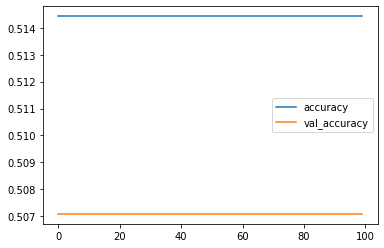

In [116]:
# # plotting the accuracy and validation accuracy of the model
# plt.plot(r.history['accuracy'], label= 'accuracy')
# plt.plot(r.history['val_accuracy'], label='val_accuracy')
# plt.legend()


In [150]:
# # Predicting the sentiment of any text

# def predict_sentiment(text):
#   # preprocessing the given text 
#   text_seq = tokenizer.texts_to_sequences(text)
#   text_pad = pad_sequences(text_seq, maxlen=T)

#   # predicting the class
#   predicted_sentiment = model.predict(text_pad).round()

#   if predicted_sentiment == 1.0:
#     return(print('It is a positive sentiment'))
#   elif predicted_sentiment ==2.0:
#     return(print('It is a negative sentiment'))
#   else:
#     return(print('It is a neutral sentiment'))

# text = ['কাহিনীর গল্প খুব বাজে']
# predict_sentiment(text)

Now we will prepare the dataset to train in the proposed CNN network.So, we have to convert all Sentences into a numpy Array.

We have divided the training and testing data into 80/20 ratio.

We have converted the sentiment values into one hot encodings for the convenient use in model training.

In [125]:
train1, test1 = train_test_split(data,random_state=69, test_size=0.2)
training_sentences_ott = []
testing_sentences_ott = []



train_sentences_ott=train1['Text'].values
train_labels_ott=train1['Label'].values
for i in range(train_sentences_ott.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences_ott[i])
    training_sentences_ott.append(x)
    
training_sentences_ott=np.array(training_sentences_ott)





test_sentences_ott=test1['Text'].values
test_labels_ott=test1['Label'].values

for i in range(test_sentences_ott.shape[0]): 
    x=str(test_sentences_ott[i])
    testing_sentences_ott.append(x)
    
testing_sentences_ott=np.array(testing_sentences_ott)


train_labels_ott=tf.keras.utils.to_categorical(train_labels_ott)


test_labels_ott=tf.keras.utils.to_categorical(test_labels_ott)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences_ott.shape))
print("testing_sentences shape: "+str(testing_sentences_ott.shape))
print("train_labels shape: "+str(train_labels_ott.shape))
print("test_labels shape: "+str(test_labels_ott.shape))

Training Set Length: 5268
Testing Set Length: 1317
training_sentences shape: (5268,)
testing_sentences shape: (1317,)
train_labels shape: (5268, 3)
test_labels shape: (1317, 3)


In [128]:
print(training_sentences_ott[0])
print(train_labels_ott[0])

ভিগ মাথা নষ্ট মামা
[0. 0. 1.]


Now, we will predefine some variables.

vocab_size is the maximum vocabulary length of Tokenizer.

KERAS tokenzier allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf.

We will be tokenizing my dataset with this class here. We have did this tokenization so that it can be later used to generate Embeddings.

The main advantage of word embedding is that words that share a similar context can be represented close to each other in the vector space. Thus, vectors carry a sense of semantic of a word.

We have predefined the embedding dimension as 300(embedding_dim).

max_length is the sentence maximum length.

trunc_type is the truncation type.

oov_token is the token for the words that are not present in the corpus.oov means out of vocabulary.

In [131]:
vocab_size = len(training_sentences_ott)+1
embedding_dim = 100
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

In [132]:
print(training_sentences_ott.shape)
print(train_labels_ott.shape)

(5268,)
(5268, 3)


At first, we will tokenize and then, we will be padding the sequences. We have used tokenizer only on training dataset to see how the model performs on unseen words.

In [133]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences_ott)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences_ott)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences_ott)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

8675
Word index length:8675


In [134]:
print("Sentence :--> \n")
print(training_sentences_ott[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

মিউজিককন্ঠ টিউনগান কথা অসাধারণ

Sentence Tokenized and Converted into Sequence :--> 

[3264, 3265, 18, 6]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   

In [135]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5268, 200)
Padded shape(testing): (1317, 200)


# Model Creation

At first, we have created embeddings from the text.

In [136]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = 2 * (pr * rec) / (pr + rec)
    return f1_score

In [137]:
# padded
train_labels_ott

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [138]:
# from tensorflow.keras.layers import GlobalMaxPooling1D

detection=Sequential()

detection.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

#1 -convolutional layer-1
detection.add(Conv1D(64 ,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.1))

#2 -convolutional layer-2
detection.add(Conv1D(96,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

#2 -convolutional layer-2
detection.add(Conv1D(128,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.15))


# #2 -convolutional layer-2
# detection.add(Conv1D(256,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(384,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(512,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.3))


# detection.add(Flatten())
# detection.add(Dense(512))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

# detection.add(Flatten())
# detection.add(Dense(256))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(128))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(64))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Dense(3,activation='softmax'))
optimum=Adam(lr=0.00001)
detection.summary()
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy', precision, recall])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 100)          526900    
                                                                 
 conv1d_3 (Conv1D)           (None, 198, 64)           19264     
                                                                 
 batch_normalization_5 (Batc  (None, 198, 64)          256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 198, 64)           0         
                                                                 
 dropout_2 (Dropout)         (None, 198, 64)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 196, 96)           18528     
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3,790,679
Trainable params: 3,789,719
Non-trainable params: 960
_________________________________________________________________


Dividing training data to training and validation.

In [140]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded, train_labels_ott, test_size=0.20, shuffle= True) #data, label

In [141]:
model_ott = detection.fit(x_train, y_train,shuffle=True,epochs=100,batch_size=4,validation_data=(x_valid,y_valid))#,use_multiprocessing=True, workers=8)
# model_ott=detection.fit(padded,train_labels_ott,shuffle=True,epochs=30,batch_size=16,validation_data=(testing_padded,test_labels_ott),use_multiprocessing=True, workers=8) #input, output

Epoch 1/100
1054/1054 [==============================] - 82s 75ms/step - loss: 1.5082 - accuracy: 0.2280 - precision: 0.2021 - recall: 0.1482 - val_loss: 1.4063 - val_accuracy: 0.2277 - val_precision: 0.1998 - val_recall: 0.1108
Epoch 2/100
1054/1054 [==============================] - 74s 70ms/step - loss: 1.3154 - accuracy: 0.2762 - precision: 0.2341 - recall: 0.1402 - val_loss: 1.2392 - val_accuracy: 0.3046 - val_precision: 0.2809 - val_recall: 0.1089
Epoch 3/100
1054/1054 [==============================] - 74s 70ms/step - loss: 1.2154 - accuracy: 0.3306 - precision: 0.2763 - recall: 0.1501 - val_loss: 1.1520 - val_accuracy: 0.3776 - val_precision: 0.2996 - val_recall: 0.1127
Epoch 4/100
1054/1054 [==============================] - 70s 66ms/step - loss: 1.1328 - accuracy: 0.4006 - precision: 0.3980 - recall: 0.1879 - val_loss: 1.1137 - val_accuracy: 0.4118 - val_precision: 0.3592 - val_recall: 0.1458
Epoch 5/100
1054/1054 [==============================] - 70s 67ms/step - loss: 1.083

In [151]:
score = detection.evaluate(x_valid, y_valid, verbose=1)

33/33 [==============================] - 1s 31ms/step - loss: 0.8773 - accuracy: 0.6917 - precision: 0.7175 - recall: 0.6601


In [152]:
# Model Performance

print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 69.17%


In [153]:
detection.evaluate(x=testing_padded,y=test_labels_ott,verbose=1)
# loss: - accuracy: - recall:  - precision:

42/42 [==============================] - 1s 31ms/step - loss: 0.8518 - accuracy: 0.6720 - precision: 0.6955 - recall: 0.6326


[0.8518332242965698, 0.6719817519187927, 0.695514976978302, 0.6325892806053162]

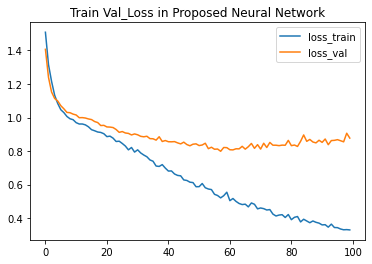

<Figure size 432x288 with 0 Axes>

In [154]:
plt.plot(model_ott.history['loss'], label='loss_train')
plt.plot(model_ott.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

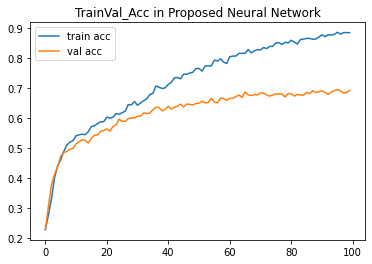

<Figure size 432x288 with 0 Axes>

In [155]:
plt.plot(model_ott.history['accuracy'], label='train acc')
plt.plot(model_ott.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')

In [156]:
# Predicting the sentiment of any text

def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=max_length)

  # predicting the class
  predicted_sentiment = detection.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('It is a positive sentiment'))
  elif predicted_sentiment ==2.0:
    return(print('It is a negative sentiment'))
  else:
    return(print('It is a neutral sentiment'))

text = ['কাহিনীর গল্প খুব বাজে']
predict_sentiment(text)

1/1 [==============================] - 0s 487ms/step


ValueError: ignored

In [ ]:
from keras.layers import LSTM

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(3, activation='softmax'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(lstm_model.summary())

In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_valid,y_valid))

In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(x_valid, y_valid, verbose=1)

In [ ]:
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the sentiment of any text LSTM

def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=max_length)

  # predicting the class
  predicted_sentiment = lstm_model.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('It is a positive sentiment'))
  elif predicted_sentiment ==2.0:
    return(print('It is a negative sentiment'))
  else:
    return(print('It is a neutral sentiment'))

text = ['কাহিনীর গল্প খুব বাজে']
predict_sentiment(text)

In [ ]:
ann = Sequential()

In [ ]:
#Add the input layer and the first hidden layer
ann.add(Dense(units = 64,activation='relu',input_dim = max_length))
#Add the second hidden layer
ann.add(Dense(units = 64,activation='relu'))
#Add the output layer
ann.add(Dense(units = 3,activation='softmax'))

In [ ]:
#Compile the ANN
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.summary()

In [ ]:
model_ann=ann.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=200,epochs=2)

In [ ]:
score = ann.evaluate(x_valid, y_valid, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
plt.plot(model_ann.history['loss'], label='loss_train')
plt.plot(model_ann.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

In [ ]:
plt.plot(model_ann.history['accuracy'], label='train acc')
plt.plot(model_ann.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')

In [ ]:

from tensorflow.keras.layers import SimpleRNN

# define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))#24--86
model.add(SimpleRNN(24, return_sequences=False)) #24--86
model.add(Dense(3, activation='softmax')) #2--86%

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #optimizer='rmsprop' --86

# summarize the model
print(model.summary())

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import SimpleRNN
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model RNN
model_rnn=model.fit(x_train,y_train,epochs=2,validation_data=(x_valid,y_valid), verbose=1 ,callbacks=[early_stop])

In [ ]:
# Predictions on the Test Set

score = model.evaluate(x_valid, y_valid, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
plt.plot(model_rnn.history['loss'], label='loss_train')
plt.plot(model_rnn.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

In [ ]:
plt.plot(model_rnn.history['accuracy'], label='train acc')
plt.plot(model_rnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')